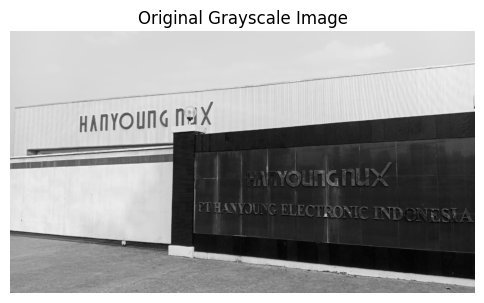

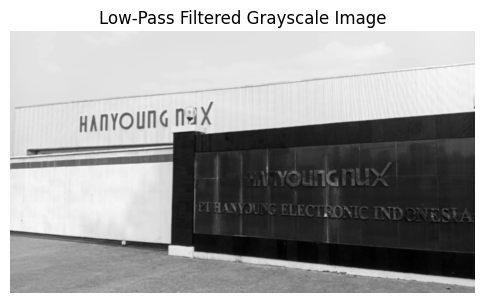

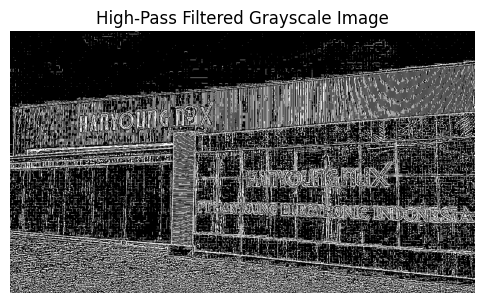

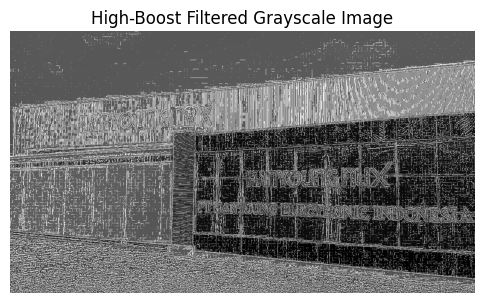

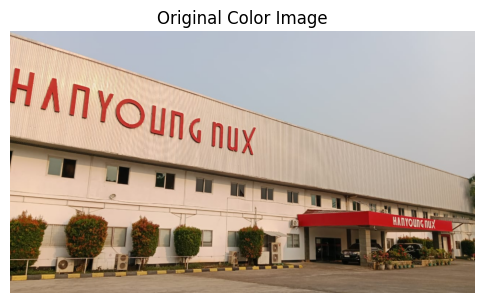

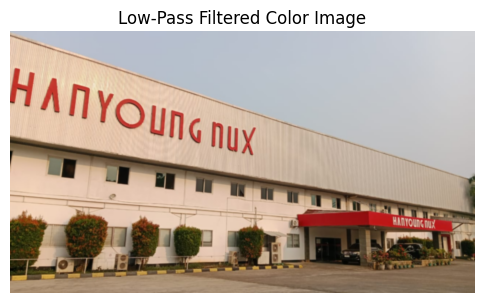

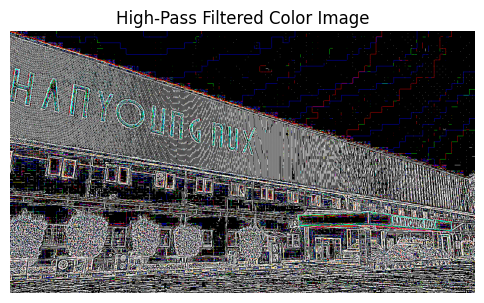

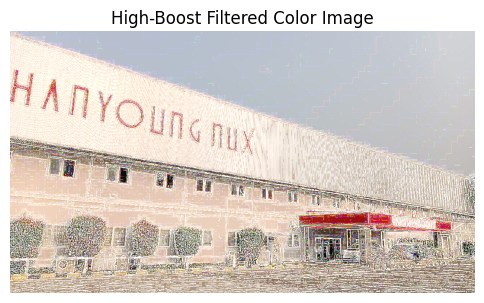

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def show_image(title, image):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load citra grayscale dan citra berwarna
image_gray = cv2.imread('/content/WhatsApp Image 2024-11-04 at 12.55.03.jpeg', cv2.IMREAD_GRAYSCALE)  # Gantilah dengan path gambar grayscale
image_color = cv2.imread('/content/WhatsApp Image 2024-11-04 at 13.10.48.jpeg')  # Gantilah dengan path gambar berwarna Anda

# Pastikan gambar ada
if image_gray is None or image_color is None:
    print("Gambar tidak ditemukan.")
    exit()

# Fungsi untuk filter low-pass (Gaussian Blur)
def low_pass_filter(image, kernel_size=5):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Fungsi untuk filter high-pass
def high_pass_filter(image, kernel_size=5):
    # Membuat kernel Gaussian
    low_pass = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    # Mengurangi citra asli dengan citra hasil low-pass untuk mendapatkan high-pass
    high_pass = image - low_pass
    return high_pass

# Fungsi untuk filter high-boost
def high_boost_filter(image, kernel_size=5, alpha=1.5):
    # Filter high-pass
    high_pass = high_pass_filter(image, kernel_size)
    # Menggabungkan high-pass dengan citra asli untuk mendapatkan high-boost
    high_boost = image + alpha * high_pass
    return high_boost

# Terapkan filter low-pass, high-pass, dan high-boost pada citra grayscale
low_pass_gray = low_pass_filter(image_gray)
high_pass_gray = high_pass_filter(image_gray)
high_boost_gray = high_boost_filter(image_gray)

# Terapkan filter low-pass, high-pass, dan high-boost pada citra berwarna
# Di sini, kita akan menerapkan filter pada tiap saluran warna (R, G, B)
def apply_filter_to_color_image(image, filter_function, kernel_size=5, alpha=1.5):
    channels = cv2.split(image)
    filtered_channels = [filter_function(channel, kernel_size, alpha) if filter_function == high_boost_filter else filter_function(channel, kernel_size) for channel in channels]
    return cv2.merge(filtered_channels)

low_pass_color = apply_filter_to_color_image(image_color, low_pass_filter)
high_pass_color = apply_filter_to_color_image(image_color, high_pass_filter)
high_boost_color = apply_filter_to_color_image(image_color, high_boost_filter)

# Pastikan hasil high-boost diubah menjadi uint8 dan nilai pixel dikendalikan antara 0-255
high_boost_color = np.clip(high_boost_color, 0, 255).astype(np.uint8)

# Menampilkan hasilnya
show_image("Original Grayscale Image", image_gray)
show_image("Low-Pass Filtered Grayscale Image", low_pass_gray)
show_image("High-Pass Filtered Grayscale Image", high_pass_gray)
show_image("High-Boost Filtered Grayscale Image", high_boost_gray)

# Mengonversi citra BGR ke RGB untuk penampilan menggunakan matplotlib
show_image("Original Color Image", cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
show_image("Low-Pass Filtered Color Image", cv2.cvtColor(low_pass_color, cv2.COLOR_BGR2RGB))
show_image("High-Pass Filtered Color Image", cv2.cvtColor(high_pass_color, cv2.COLOR_BGR2RGB))
show_image("High-Boost Filtered Color Image", cv2.cvtColor(high_boost_color, cv2.COLOR_BGR2RGB))